In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

627


In [4]:
cities_df = pd.DataFrame({"City" : cities})
cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Wind Speed"] = ""


## Perform API Calls

In [5]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?" 
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="

In [6]:
cloudiness = []
country = []
date = []
lat = []
lng = []
max_temp = []
wind = []
humidity = []


for index, row in cities_df.iterrows():
    try:
        city = row["City"]
        response = requests.get(query_url + city).json()
        cloudiness = response['clouds']['all']
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        date = response['dt']
        humidity = response['main']['humidity']
        max_temp = response['main']['temp_max']
        country = response['sys']['country']
        wind = response['wind']['speed']
        
        
        cities_df.at[index, "Cloudiness"] = cloudiness
        cities_df.at[index, "Lat"] = lat
        cities_df.at[index, "Lng"] = lng
        cities_df.at[index, "Date"] = date
        cities_df.at[index, "Humidity"] = humidity
        cities_df.at[index, "Max Temp"] = max_temp
        cities_df.at[index, "Country"] = country
        cities_df.at[index, "Wind Speed"] = wind
        print(f'Processing Record {index} | {city}')
        print(f'{query_url}')
        
    except Exception as e:
        print(f'Processing Record {index} | {city}')
        print(f'{city} Missing field/result... skipping.')
    pass

Processing Record 0 | reyes
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 1 | bonavista
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 2 | oranjemund
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 3 | illoqqortoormiut
illoqqortoormiut Missing field/result... skipping.
Processing Record 4 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 5 | yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 6 | barrow
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 7 | solnechnyy
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238

Processing Record 65 | pangkalanbuun
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 66 | akdepe
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 67 | kenai
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 68 | toliary
toliary Missing field/result... skipping.
Processing Record 69 | kungurtug
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 70 | brewster
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 71 | port lincoln
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 72 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19c

Processing Record 130 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 131 | fortuna
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 132 | karagay
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 133 | gboko
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 134 | bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 135 | lethem
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 136 | sola
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 137 | burnie
http://api.ope

Processing Record 193 | avarua
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 194 | kant
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 195 | sitka
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 196 | husavik
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 197 | albany
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 198 | camacha
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 199 | suileng
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 200 | bluff
http://api.openweathermap

Processing Record 256 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 257 | taltal
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 258 | tshane
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 259 | olafsvik
olafsvik Missing field/result... skipping.
Processing Record 260 | katsuura
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 261 | nam tha
nam tha Missing field/result... skipping.
Processing Record 262 | korla
korla Missing field/result... skipping.
Processing Record 263 | korcula
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 264 | clinton
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19c

Processing Record 320 | naftah
naftah Missing field/result... skipping.
Processing Record 321 | caledonia
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 322 | amderma
amderma Missing field/result... skipping.
Processing Record 323 | andevoranto
andevoranto Missing field/result... skipping.
Processing Record 324 | shanhetun
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 325 | bonthe
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 326 | havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 327 | ugoofaaru
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 328 | baruun-urt
http://api.openweathermap.org/data/2.5/we

Processing Record 387 | formosa
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 388 | mumford
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 389 | madison heights
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 390 | hazorasp
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 391 | hami
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 392 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 393 | san policarpo
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 394 | lakes en

Processing Record 451 | yanam
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 452 | mossendjo
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 453 | playa del carmen
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 454 | palabuhanratu
palabuhanratu Missing field/result... skipping.
Processing Record 455 | tual
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 456 | ikalamavony
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 457 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 458 | saurimo
http://api.openweathermap.org/data/2.5/weat

Processing Record 514 | kirkland lake
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 515 | ornskoldsvik
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 516 | palauig
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 517 | hudson bay
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 518 | chagda
chagda Missing field/result... skipping.
Processing Record 519 | buenaventura
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 520 | porto velho
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 521 | vila
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e

Processing Record 577 | meulaboh
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 578 | souillac
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 579 | inta
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 580 | khonuu
khonuu Missing field/result... skipping.
Processing Record 581 | nara
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 582 | forbes
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 583 | quesnel
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&units=imperial&q=
Processing Record 584 | beyneu
http://api.openweathermap.org/data/2.5/weather?appid=8d7eb0e3238c19cb91c8aa58f22a8d5e&

In [8]:
cities_df.to_csv('cities_data.csv', index = True)

In [9]:
cities_df["Cloudiness"] = pd.to_numeric(cities_df["Cloudiness"])
cities_df["Lat"] = pd.to_numeric(cities_df["Lat"])
cities_df["Lng"] = pd.to_numeric(cities_df["Lng"])
cities_df["Max Temp"] = pd.to_numeric(cities_df["Max Temp"])
cities_df["Wind Speed"] = pd.to_numeric(cities_df["Wind Speed"])
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"])

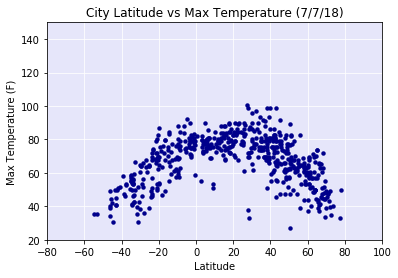

In [10]:
#Temperature (F) vs. Latitude Scatter Plot

temp_lat = cities_df.plot(kind = 'scatter', x = "Lat", y = "Max Temp", alpha=1, linewidth=0, color = 'darkblue', zorder=2)
plt.grid(color = "white")
temp_lat.set_facecolor('lavender')
plt.title("City Latitude vs Max Temperature (7/7/18)")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.xlim(-80, 100)
plt.ylim(20,150)
plt.savefig("Images/Temp_Latitude")
plt.show()

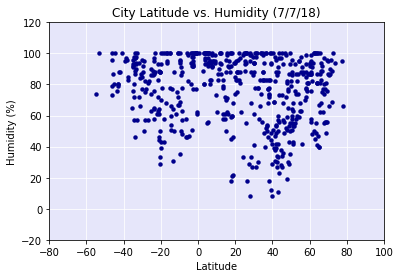

In [11]:
# Humidity (%) vs. Latitude

humid_lat = cities_df.plot(kind = 'scatter', x = "Lat", y = "Humidity", alpha=1, linewidth=0, color = 'darkblue', zorder=2)
humid_lat.set_facecolor('lavender')
plt.title("City Latitude vs. Humidity (7/7/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.grid(color='white')
plt.savefig("Images/Humidity_Latitude")
plt.show()

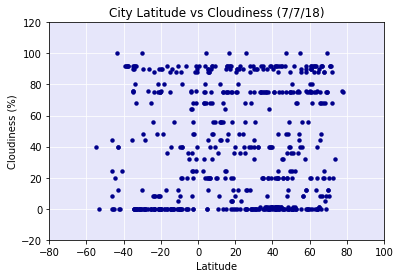

In [12]:
# Cloudiness (%) vs. Latitude

cloud_lat = cities_df.plot(kind = 'scatter', x = 'Lat', y= 'Cloudiness', alpha=1, linewidth=0, color = 'darkblue', zorder=2)
cloud_lat.set_facecolor('lavender')
plt.title("City Latitude vs Cloudiness (7/7/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.grid(color= 'white')
plt.savefig("Images/Cloudiness_Latitude")
plt.show()

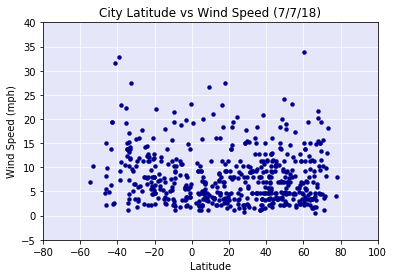

In [13]:
# Wind Speed (mph) vs. Latitude

# wind_lat = plt.axes(frameon=False)
wind_lat = cities_df.plot(kind = 'scatter', x = 'Lat', y = 'Wind Speed', alpha=1, linewidth=0, color = 'darkblue', zorder = 2)
wind_lat.set_xlim(-80,100)
wind_lat.set_ylim(-5,40)
wind_lat.set_facecolor("lavender")
plt.title("City Latitude vs Wind Speed (7/7/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(color = 'white')

plt.savefig("Images/Wind_Latitude")

